<table align="center" width=50%>
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542 ">
                    <b><h1>Employee Attrition Prediction</h1>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement:
Create a ML model to which employees can leave company based on job type,employee information and other features to make better prediction about which employees will stay.

## Data Description:

#### FILE DESCRIPTION
==================================================  
 Our dataset contains these columns & their respective values -  
 
| Column Name | Categories/Range of Values |
|-------------|-------|
| Age | 18-60 |
| Attrition | Yes,No |
| BusinessTravel |'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'  |
| DailyRate | 102-1499 |
| Department | 'Human Resources', 'Research & Development', 'Sales' |
| DistanceFromHome | 1-29 |
| Education | 1-5 |
| EducationField | 'Human Resources', 'Life Sciences', 'Marketing', 'Medical','Other', 'Technical Degree' |
| EmployeeCount | 1 |
| EmployeeNumber | 1-2068 |
| EnvironmentSatisfaction | 1-4 |
| Gender | 'Female', 'Male' |
| HourlyRate | 30-100 |
| JobInvolvement | 1-4 |
| JobLevel | 1-5 |
| JobRole | 'Healthcare Representative', 'Human Resources','Laboratory Technician', 'Manager', 'Manufacturing Director','Research Director', 'Research Scientist', 'Sales Executive','Sales Representative' |
| JobSatisfaction | 1-4 |
| MaritalStatus | 'Divorced', 'Married', 'Single' |
| MonthlyIncome | 1099-19999 |
| MonthlyRate | 2049-26999 |
| NumCompaniesWorked | 0-9 |
| Over18 | Y |
| OverTime | No', 'Yes' |
| PercentSalaryHike | 11-25 |
| PerformanceRating | 3,4 |
| RelationshipSatisfaction | 1-4 |
| StandardHours | 80 |
| StockOptionLevel | 0-3 |
| TotalWorkingYears | 0-40 |
| TrainingTimesLastYear | 0-6 |
| WorkLifeBalance | 1-4 |
| YearsAtCompany | 0-40 |
| YearsInCurrentRole | 0-18 |
| YearsSinceLastPromotion | 0-15 |
| YearsWithCurrManager | 0-17 |




## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data & Data Formatting](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
5. **[Model](#rec_sys)**
6. **[Result](#Res)**

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
from IPython.display import Markdown

# 2. Set Options <a id='set_options'></a>

In [2]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

# 3. Read Data & Data Formatting<a id='Read_Data'></a>

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# To show the first 2 row of data
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [5]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [6]:
#function to get unique values of all column in sorted order.
def value_countsofall(df):
    column=list(df.columns)
    res=[]
    for col in column:
        res.append(col)
        res.append(np.sort(df[col].drop_duplicates().values))
    return res

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

Basic Info of data

In [7]:
columns = list(df.columns)
display(Markdown(f"**List of columns  :** {columns}"))

**List of columns  :** ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [8]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  1470
No. of columns:  35


Our Dataset contains 35 columns 


Which contain 1 feature 'Attrition' which we are goin to predict.



Rest 34 are employee features which we are going to use

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Above is all column in our dataset with their data types

### Missing Values

In [10]:
#Checking the null values in our dataset column wise. 
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

so luckily we  have **0 null values**.

For attrition column the distribution of values is unequal between both categories.

In [11]:
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


There are **No Duplicate values** present in the dataset

## Feature Engineering

<AxesSubplot:xlabel='Age', ylabel='count'>

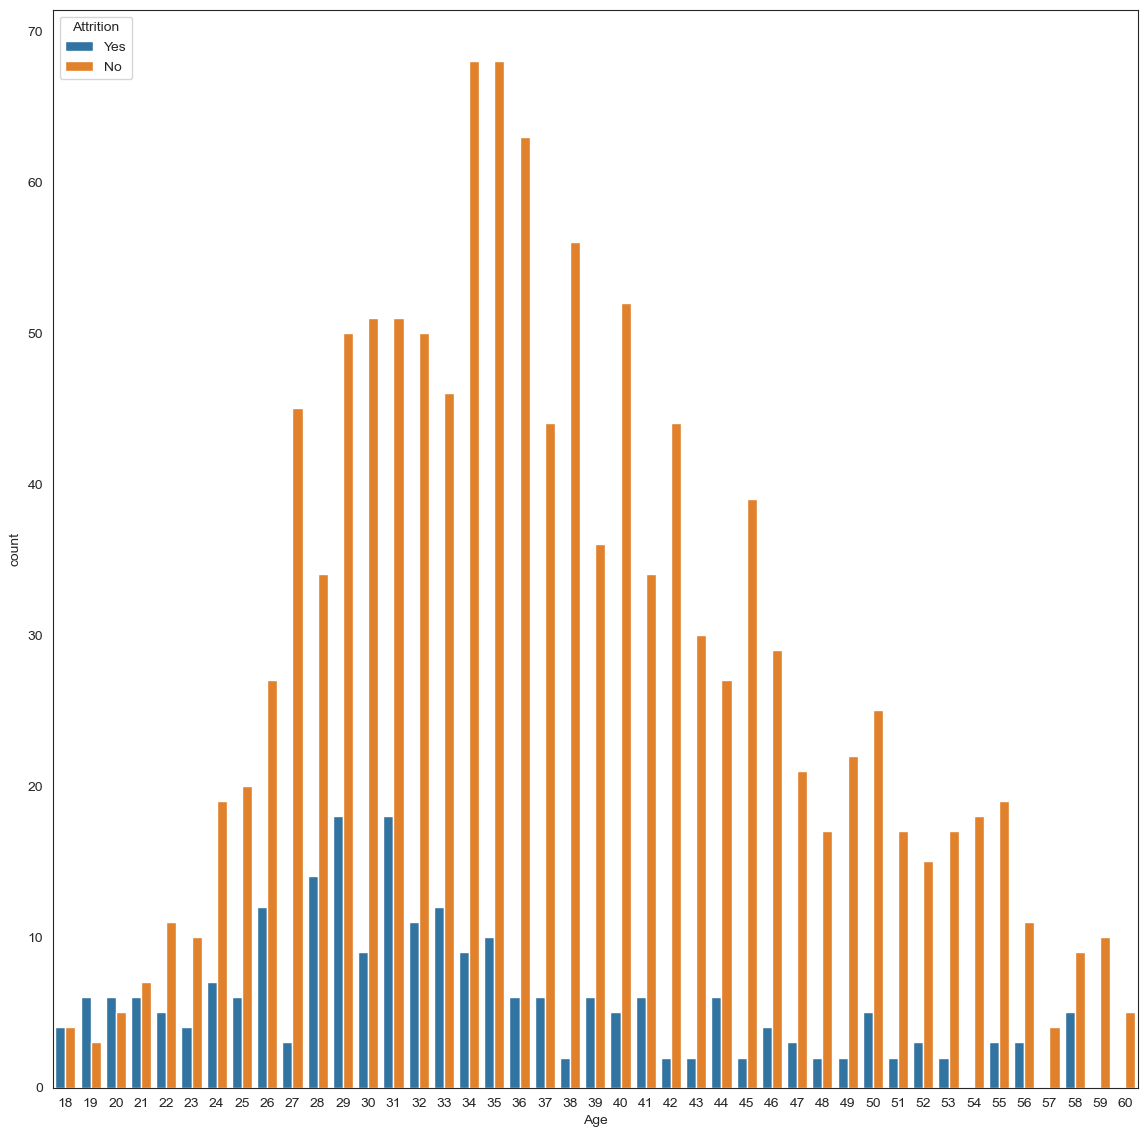

In [12]:
# Graph showing how age wise employee attrition 
plt.figure(figsize=(14,14)) 
sns.countplot(x='Age',hue='Attrition',data=df)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
df=df.drop('EmployeeCount',axis=1)
df=df.drop('EmployeeNumber',axis=1)
df=df.drop('StandardHours',axis=1)

In [16]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,0.00,-0.06,0.02,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,0.03,0.15,-0.03,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


<AxesSubplot:>

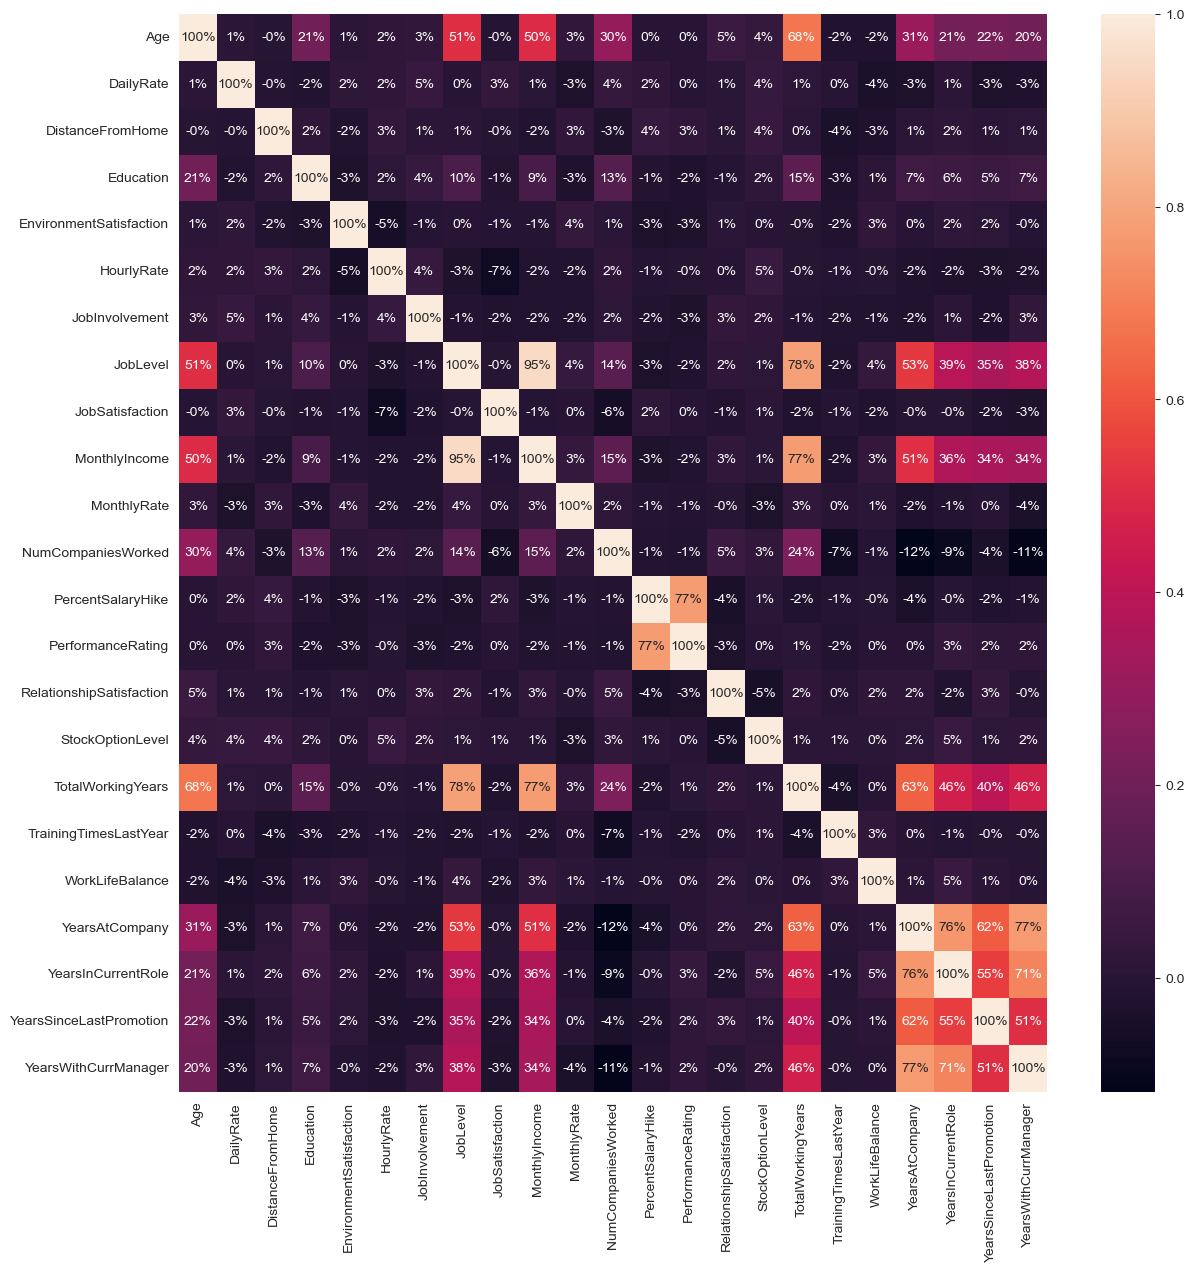

In [17]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True,fmt='.0%')

In [18]:

for column in df.columns:
    if df[column].dtype.kind in 'if':
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

In [19]:
df['Agegroup']=df['Age']
df=df.drop('Age',axis=1)
df.head(2)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Agegroup
0,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,1,10,3,3,10,7,1,7,49


In [20]:
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [21]:
df.shape[0]

1470

# 5. Model <a id='rec_sys'></a>

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [23]:
forest=RandomForestClassifier(n_estimators=13,random_state =2)
forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=13, random_state=2)

In [24]:
forest.score(X_train,Y_train)

0.9927404718693285

In [25]:
#Creating confusion matrix
cm=confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print()

[[302   8]
 [ 45  13]]



# 6. Result <a id='res'></a>

In [26]:
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print('Model Testing Precision = "{}!"'.format(  (TP) / (TP + FP)))
print('Model Testing Recall = "{}!"'.format(  (TP) / (TP + FN)))

Model Testing Accuracy = "0.8559782608695652!"
Model Testing Precision = "0.6190476190476191!"
Model Testing Recall = "0.22413793103448276!"


**We've got Accuracy of around 86%**